In [1]:
import pandas as pd
import re
import numpy as np
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import model_selection
from sklearn.metrics import accuracy_score, log_loss
import sklearn
import string
import seaborn as sns
from tensorflow.keras.optimizers import Adam
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support

In [2]:
data = pd.read_csv('../input/mri-nlp/cleaned_data_H.tsv',sep="\t")
import warnings
warnings.filterwarnings('ignore') #ignore warning messages 
data.head()

,Transcripts,AD
0,there's &um a young boy that's getting a cooki...,1
1,and it he's uh in bad shape because uh the thi...,1
2,and in the picture the mother is washing dishe...,1
3,and the dishes might get falled over if you don't,1
4,fell fall over there there if you don't get it,1


In [3]:
CLASS = 'AD'
df = data

# Preprocessing

In [4]:
import string

def stem_words(text):
    text = text.split()
    stemmed_words = [stemmer.stem(word) for word in text]
    text = " ".join(stemmed_words)
    return text

def clean_data(text):
    sentence = text.lower()
    sentence_no_punct = sentence.translate(table_)
    space_remove = re.sub('\s+',' ', sentence_no_punct)
    return space_remove

table = str.maketrans(string.punctuation, ' '*len(string.punctuation))
string_punctuation_1 = string.punctuation.replace(".","").replace("`","").replace("'","")
table_ = str.maketrans(string_punctuation_1, ' '*len(string_punctuation_1))
printable = set(string.printable)

stemmer = SnowballStemmer('english')
df['Transcripts_cleaned'] = df['Transcripts'].apply(lambda row: clean_data(row) )
df['Transcripts_stem'] = df['Transcripts_cleaned'].apply(lambda row: stem_words(row))
vectorizer = TfidfVectorizer(stop_words='english',max_features=1000,min_df=5, max_df=0.9) 
X = vectorizer.fit_transform(df['Transcripts_cleaned'].tolist())

In [5]:
print(np.unique(data[CLASS]))

[0 1]


In [6]:
X = X.toarray()
Y= np.array(df['AD'].tolist())

In [22]:
#Splitting data

X_seq_train, X_seq_test, y_seq_train, y_seq_test = train_test_split(df['Transcripts_cleaned'], df['AD'], test_size = 0.1, random_state = 0)

In [23]:
from keras.models import Sequential
from keras.layers import Embedding, Dropout,Conv1D, Flatten, MaxPooling1D, Dense, LSTM,Conv1D,MaxPooling1D, Bidirectional
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.constraints import maxnorm
from keras.preprocessing import sequence
from keras.callbacks import History
import matplotlib.pyplot as plt
%matplotlib inline
#Tokenizing sentences

tokenizer = Tokenizer(num_words = 2500)
tokenizer.fit_on_texts(X_seq_train)

Xwords_train = tokenizer.texts_to_sequences(X_seq_train)
Xwords_test = tokenizer.texts_to_sequences(X_seq_test)

#Padding the sentence sequences

max_review_length = 100
Xwords_train = sequence.pad_sequences(Xwords_train, maxlen=max_review_length)
Xwords_test = sequence.pad_sequences(Xwords_test, maxlen=max_review_length)

print(Xwords_train.shape)
print(Xwords_test.shape)
print(y_seq_train.shape)
print(y_seq_test.shape)


vocab = len(tokenizer.word_index) + 1   # Add one for the zero indexing
vocab

#setting history parameter to record accuracy and loss info of model

history = History()

(2944, 100)
(328, 100)
(2944,)
(328,)


In [8]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import  metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
import seaborn as sns

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import model_selection
from sklearn.metrics import accuracy_score, log_loss
import sklearn
import string
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import roc_curve, auc, roc_auc_score,accuracy_score,confusion_matrix
import warnings
warnings.filterwarnings("ignore")
def onevsall(y_true,y_pred,mod):
    
    
    global rdf
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    acc = (tp+tn)/(tp+tn+fp+fn)
    pre = tp/(tp+fp)
    rec = tp/(tp+fn)
    f1 = 2*rec*pre / (rec +pre)
    sp = tn / (tn +fp)
    #print('Done for '+mod)
    rdf=rdf.append({
            'Model':mod,
            'TN':tn,'FP':fp,'FN':fn,'TP':tp,
            'Accuracy':acc,
            'Precision':pre,
            'Recall or Sensitivity':rec,
            'F1 Score':f1,
            'Specificity':sp
        },ignore_index=True)
        
    return rdf

def roc(clf,x,y):
    import scikitplot as skplt
    import matplotlib.pyplot as plt
    skplt.metrics.plot_roc_curve(clf,x,y)
    plt.savefig('ROC'+model_name+'.jpg')
    plt.show()
    
def visualise(y_true,y_pred,name,model_name):
    ConfusionM = confusion_matrix(y_true,y_pred)

    #print('ROC AUC score:', 
    #multiclass_roc_auc_score(y_true,y_pred, ))
    print(classification_report(y_true,y_pred,   digits=4))
    print()
    fig, ax = plt.subplots(figsize=(6,4)) 
    import seaborn as sns
    sns.heatmap(ConfusionM, annot=True,
            fmt='g',xticklabels=name, yticklabels=name)
    plt.title('Confusion Matrix for '+model_name)
    plt.savefig('CM_'+model_name+'.jpg')
    plt.show()
    return onevsall(y_true,y_pred,model_name)

In [30]:
from tensorflow.keras.models import load_model
def pred(path,name):
    mc = load_model(path)
    print(mc.summary())
    y_pred = mc.predict(Xwords_test)
    y_pred = [round(i[0]) for i in y_pred]
    visualise(y_seq_test,y_pred,np.unique(y_seq_test),name)

In [10]:
rdf = pd.DataFrame()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          109800    
_________________________________________________________________
dropout (Dropout)            (None, 100, 100)          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 96, 32)            16032     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 24, 32)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                24832     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 150,729
Trainable params: 150,729
Non-trainable params: 0
________________________________________________

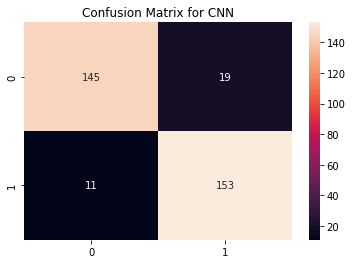

In [31]:
pred('../input/mri-nlp/Model_Conv.h5', 'CNN')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          109800    
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 227,177
Trainable params: 227,177
Non-trainable params: 0
_________________________________________________________________
None
              precision    recall  f1-score   support

           0     0.8059    0.8354    0.8204       164
           1     0.8291    0.7988    0.8137       164

    accuracy                         0.8171       328
   macro avg     0.8175    0.8171    0.8170       328
weighted avg     0.8175    0.8171    0.8170       328




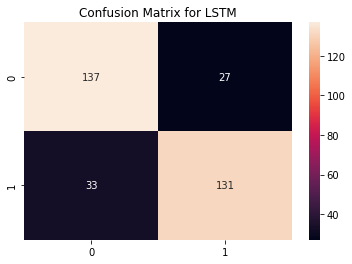

In [32]:
pred('../input/mri-nlp/Model_LSTM.h5', 'LSTM')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          109800    
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               234496    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 344,553
Trainable params: 344,553
Non-trainable params: 0
_________________________________________________________________
None
              precision    recall  f1-score   support

           0     0.8662    0.8293    0.8474       164
           1     0.8363    0.8720    0.8537       164

    accuracy                         0.8506       328
   macro avg     0.8512    0.8506    0.8505       328
weighted avg     0.8512    0.8506    0.8505       328




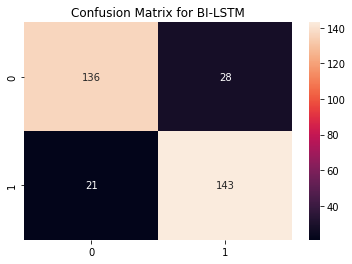

In [33]:
pred('../input/mri-nlp/model_bilstm.h5', 'BI-LSTM')

# CV

In [35]:
Xwords_test

array([[  0,   0,   0, ...,  28,   3, 231],
       [  0,   0,   0, ...,   5, 304,  12],
       [  0,   0,   0, ...,  50,  14, 130],
       ...,
       [  0,   0,   0, ...,  21, 184,  39],
       [  0,   0,   0, ...,  45,   1,  20],
       [  0,   0,   0, ...,   1, 353,  99]], dtype=int32)

In [45]:
models_f1 = [load_model('../input/mri-nlp/Model_Conv.h5'),
             load_model('../input/mri-nlp/Model_LSTM.h5'),
             load_model('../input/mri-nlp/model_bilstm.h5')]

In [46]:
models_f1

0      0
1      0
2      0
3      1
4      1
      ..
323    0
324    0
325    1
326    1
327    0
Name: AD, Length: 328, dtype: int64

In [60]:
from sklearn.model_selection import ShuffleSplit
from tqdm import tqdm
montecarlo_rns = ShuffleSplit(n_splits=100, test_size=0.20, random_state=0)
j = 1
montedf = pd.DataFrame()
for a, b in tqdm(montecarlo_rns.split(Xwords_test)):
    X_t = Xwords_test[a]
    y_seq_test = y_seq_test.reset_index(drop = True)
    Y_t = y_seq_test[a]
    
    rdf = pd.DataFrame()
    names = ['CNN','LSTM','bi-LSTM']
    k= 0
    for clf in models_f1:
        y_pred = clf.predict(X_t)
        y_pred = [round(i[0]) for i in y_pred]
        onevsall(Y_t,y_pred,names[k])
        k = k + 1
    rdf['Monte_Carlo_iteration']='Iteration_'+str(j)
    montedf = pd.concat([montedf,rdf])
    j = j + 1

100it [04:32,  2.73s/it]


In [62]:
print(montedf.shape)
montedf

(300, 11)


,Model,TN,FP,FN,TP,Accuracy,Precision,Recall or Sensitivity,F1 Score,Specificity,Monte_Carlo_iteration
0,CNN,117.0,13.0,9.0,123.0,0.916031,0.904412,0.931818,0.917910,0.900000,Iteration_1
1,LSTM,111.0,19.0,25.0,107.0,0.832061,0.849206,0.810606,0.829457,0.853846,Iteration_1
2,bi-LSTM,110.0,20.0,15.0,117.0,0.866412,0.854015,0.886364,0.869888,0.846154,Iteration_1
0,CNN,108.0,15.0,10.0,129.0,0.904580,0.895833,0.928058,0.911661,0.878049,Iteration_2
1,LSTM,104.0,19.0,31.0,108.0,0.809160,0.850394,0.776978,0.812030,0.845528,Iteration_2
...,...,...,...,...,...,...,...,...,...,...,...
1,LSTM,109.0,21.0,26.0,106.0,0.820611,0.834646,0.803030,0.818533,0.838462,Iteration_99
2,bi-LSTM,108.0,22.0,16.0,116.0,0.854962,0.840580,0.878788,0.859259,0.830769,Iteration_99
0,CNN,116.0,17.0,8.0,121.0,0.904580,0.876812,0.937984,0.906367,0.872180,Iteration_100
1,LSTM,109.0,24.0,27.0,102.0,0.805344,0.809524,0.790698,0.800000,0.819549,Iteration_100


In [63]:
montedf.to_csv('CV_DL.csv')

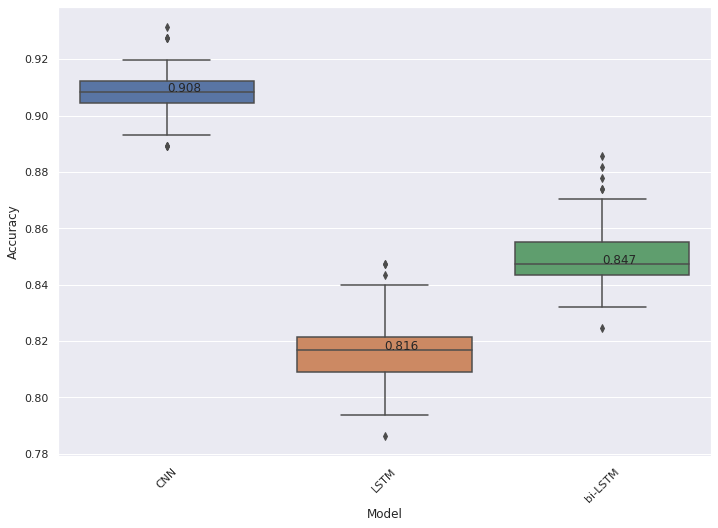

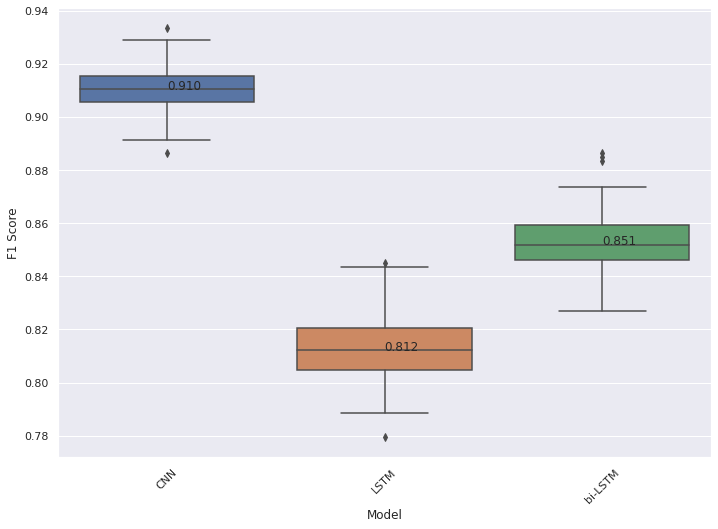

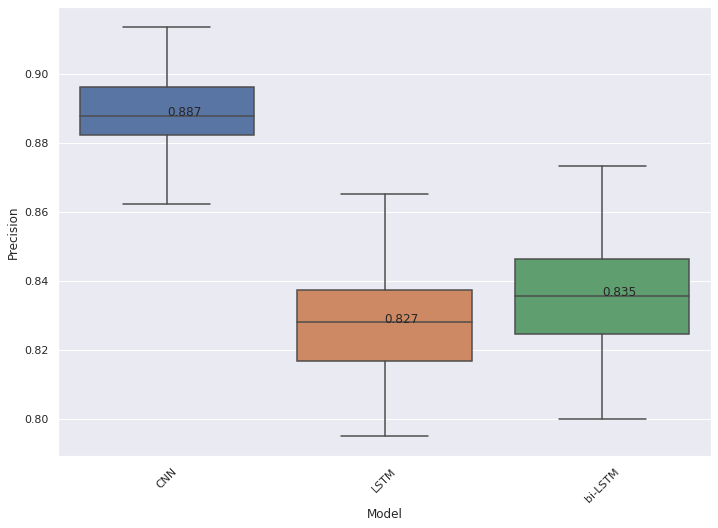

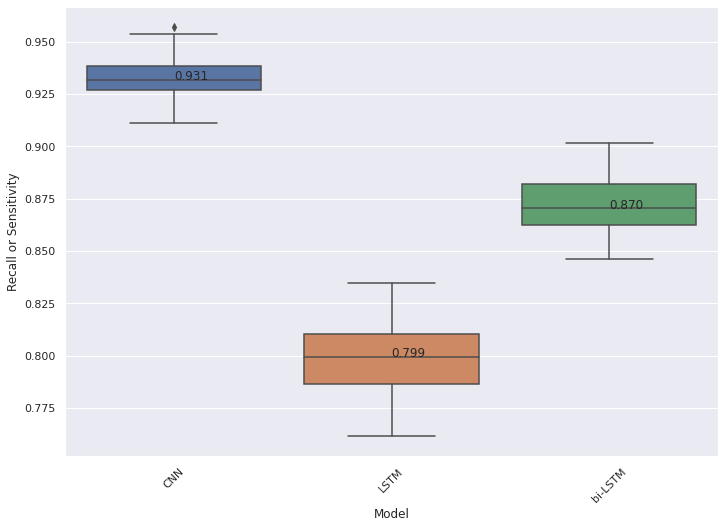

<Figure size 842.4x595.44 with 0 Axes>

In [65]:
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})
for param in ['Accuracy', 'F1 Score', 'Precision',
       'Recall or Sensitivity',]:
    monteX = montedf.sort_values(by=['Model'], ascending=False)
    medians = monteX.groupby(['Model'])[param].median().reset_index()
    Order = list(medians['Model'])
    box = sns.boxplot(x="Model", y=param,order = Order,
                     data=montedf, linewidth=1.5)
    for i in range(len(medians[param])):
        box.annotate(str(medians.iloc[i][param])[:5],xy = (i,medians.iloc[i][param]))
    plt.xticks(rotation=45)
    plt.show()
    plt.savefig('CV_mean_'+param+'.jpg')

In [66]:
op = pd.DataFrame(montedf.groupby(['Model'])['Accuracy', 'F1 Score', 'Precision',
       'Recall or Sensitivity', 'Specificity'].mean().reset_index())
op.to_csv('CV_mean.csv')
op

,Model,Accuracy,F1 Score,Precision,Recall or Sensitivity,Specificity
0,CNN,0.908015,0.910166,0.888671,0.932847,0.883234
1,LSTM,0.816260,0.812899,0.827392,0.799146,0.833394
2,bi-LSTM,0.850191,0.853348,0.835239,0.872472,0.827990


In [71]:
! sudo apt-get install zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
zip is already the newest version (3.0-11build1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [69]:
!zip -r DL_CV_algo.zip ./

updating: __notebook_source__.ipynb (deflated 44%)
updating: CV_DL.csv (deflated 80%)
updating: .virtual_documents/ (stored 0%)
updating: CM_BI-LSTM.jpg (deflated 27%)
updating: CV_mean_F1 Score.jpg (deflated 94%)
updating: CV_mean_Recall or Sensitivity.jpg (deflated 94%)
updating: CV_mean_Accuracy.jpg (deflated 94%)
updating: CM_CNN.jpg (deflated 29%)
updating: CM_LSTM.jpg (deflated 27%)
updating: CV_mean_Precision.jpg (deflated 94%)
updating: CV_mean.csv (deflated 35%)
